# Datenanalyse II: Pandas 

## Series 

Pandas stellt dem Anwender zwei Datenobjekte zur Verfügung, die das Verarbeiten von Vektoren und Matrizen sehr einfach machen: Series und DataFrame. Series ist eine eindimensionale Datenstruktur, die Daten jedes Typs enthalten kann (int, str, float, object usw.). Die Feldinformationen über die Series werden als 'index' bezeichnet und bei der Erzeugung oder danach angegeben:<br/>
s = pd.Series(data, index=index)
<br/>
data kann ein Python dictionary, eine Python Liste, ein numpy array oder ein einzelner Wert (scalar) sein.

In [31]:
%matplotlib inline
#generisches import statement
import pandas as pd

#Erzeugen einer Series, Feldbezeichner werden über index gesetzt
d = [21,22,23,24,25]
s = pd.Series(d, index=["a","b","c","d","e"])
s

a    21
b    22
c    23
d    24
e    25
dtype: int64

In [32]:
#hier werden die Feldbezeichner als keys verwendet
d = dict(a=21,b=22,c=23,d=24,e=25)
s = pd.Series(d)
s

a    21
b    22
c    23
d    24
e    25
dtype: int64

In [33]:
import numpy as np
d = np.array([21,22,23,24,25])
s = pd.Series(d, index=["a","b","c","d","e"])
s

a    21
b    22
c    23
d    24
e    25
dtype: int32

Wie Sie sehen, hat eine Serie immer einen Datentyp. Wenn sie Daten mit verschiedenen Datentypen in eine Serie aufnehmen, versucht die Bibliothek damit intelligent umzugehen:

In [34]:
#kleinster gemeinsamer Nenner = float
a = [3,3.1]
d = pd.Series(a)
d

0    3.0
1    3.1
dtype: float64

In [35]:
#kleinster gemeinsamer Nenner: Objekt
#Achtung - damit sie können sie viele Operationen nicht mehr oder nicht sinnvoll ausführen!
a = ["a",3,4.2]
d = pd.Series(a)
d

0      a
1      3
2    4.2
dtype: object

Noch mehr Metadaten: Sie können die Daten auch insgesamt benamsen. Hier nennen wir sie 'count':

In [36]:
d = [21,22,23,24,25]
s = pd.Series(d, name="count", index=["a","b","c","d","e"])
s

a    21
b    22
c    23
d    24
e    25
Name: count, dtype: int64

### Schreiben und Lesen von Serien

Wir können den Inhalt einer Serie mit der Funktion .to_csv(dateinamen) in eine Datei schreiben. Mit dem keyword 'header' werden auch die Metadaten, in diesem Fall der Inhalt von name, in die Datei geschrieben.  

In [37]:
s.to_csv("series.csv", header=True)

Werfen wir einen Blick in die Datei:

In [38]:
print(open("series.csv").read())

,count
a,21
b,22
c,23
d,24
e,25



Das Lesen von Serien ist nicht ganz intuitiv, da man in pandas einen generischen Befehl für das Lesen von csv-Dateien hat, der normalerweise einen DataFrame zurückgibt und dem man mit squeeze=True sagt, dass das Ergebnis eine Serie ist. Außerdem muss man mit index_col kommunizieren, dass die erste Spalte als Index verwendet werden soll.

In [39]:
s = pd.read_csv("series.csv", squeeze=True, index_col=0)
s

a    21
b    22
c    23
d    24
e    25
Name: count, dtype: int64

#### Aufgabe

Erzeugen Sie eine Serie mit den Werten 1-20. index = a,b,c usw. Schreiben Sie das Ergebnis in eine Datei und lesen Sie die Datei dann wieder ein.

### Serien - Daten auswählen

Das Auswählen von Daten (Slicen) funktioniert erst einmal ebenso wie bei numpy, d.h. wir können einfach mit der Position auf die Daten zugreifen:

In [40]:
s[:3]

a    21
b    22
c    23
Name: count, dtype: int64

Außerdem können wir aber auch den Index dafür verwenden:

In [41]:
s["a"]

21

In [42]:
s["a":"c"]

a    21
b    22
c    23
Name: count, dtype: int64

Man kann jede Folge von Booleans als Selektionsindex verwenden. 

In [43]:
s[[True, False, True, False, True]]

a    21
c    23
e    25
Name: count, dtype: int64

Daher kann man auch jeden Ausdruck an dieser Stelle verwenden, der eine Folge von Wahrheitswerten erzeugt (die Anzahl der Wahrheitswerte muss der Anzahl der Elemente in der Serie entsprechen). Wir können also z.B. eine Bedingung so formulieren:

In [44]:
s > 23

a    False
b    False
c    False
d     True
e     True
Name: count, dtype: bool

Hier wird die Bedingung auf jedes Element der Serie angewandt und das Ergebnis ausgegeben. 
Eine solche Formulierung können wir wiederum als Index verwenden:

In [45]:
s[s > 23]

d    24
e    25
Name: count, dtype: int64

Ebenso üblich ist es, den Index des Elements als Selektionskriterium zu geben. 

In [53]:
s[[0, 2, 4]]

a    21
c    23
e    25
Name: count, dtype: int64

Auf diese Weise kann man aus einer Serie mit Werten randomisiert auswählen. Wenn ich aus der Serie d 3 Elemente zufällig auswählen will, dann erzeuge ich erst eine Liste aller Positionen in der Serie von 0 bis 4, dann wähle ich zufällig drei Zahlen aus der Liste und verwende diese dann als Index um so die Auswahl zu treffen. 

In [54]:
import random

#create list of 0 to len(s)-1
index_of_list = range(len(s))
#random.sample(population, nr_of_elements)
indx = random.sample(index_of_list, 3)
s[indx]

b    22
a    21
d    24
Name: count, dtype: int64

#### Serien verwenden

Serien verhalten sich wie mathematische Vektoren, d.h. man kann sie mit Skalaren (= einfache Zahlen) oder anderen Vektoren, die die gleiche Länge haben, multiplizieren.

In [55]:
#die Metadaten bleiben in der Ausgabe erhalten! 
s * 3

a    63
b    66
c    69
d    72
e    75
Name: count, dtype: int64

In [59]:
#Normalisierung, d.h. jedes Element der Serie wird durch die Gesamtsumme geteilt. 
#Die Summe aller Elemente ergibt 1
x = s / s.sum()
print(x)
print("Summe aller Werte in der normalisierten Serie: ", x.sum())

a    0.182609
b    0.191304
c    0.200000
d    0.208696
e    0.217391
Name: count, dtype: float64
Summe aller Werte in der normalisierten Serie:  1.0


In [61]:
#Multiplikation gleichlanger Vektoren
a = pd.Series([2,3,1,5,5])
b = pd.Series([3,4,1,5,6])
a * b

0     6
1    12
2     1
3    25
4    30
dtype: int64

In [62]:
#ACHTUNG
s * a

a   NaN
b   NaN
c   NaN
d   NaN
e   NaN
0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
dtype: float64

In [64]:
#nur die Daten mit den gleichen Metadaten werden wie erwartet verarbeitet
c = pd.Series([2,5,1,3,5],["a","b","c","d","e"])
s * c

a     42
b    110
c     23
d     72
e    125
dtype: int64

In [65]:
s + c

a    23
b    27
c    24
d    27
e    30
dtype: int64

Außerdem können wir die statistischen Methoden aus numpy verwenden oder auch Pandas eigene

In [67]:
print(np.mean(s))
s.mean()

23.0


23.0

### DataFrame

Ein DataFrame ist eine zweidimensionale Datenstruktur mit Spalten, die unterschiedliche Datentypen haben können.

#### DataFrames erstellen

Wir schauen uns zuerst an, wie man DataFrames erstellt, auch wenn das in der Datenanalyse gar nicht so häufig vorkommt, da man zumeist irgendwo erzeugte Daten aus Dateien einliest. 

Es mehrere Wege ein DataFrame zu erstellen. 

In [70]:
#aus einem zwei dimensionalen array oder einer vergleichbaren numpy-Datenstruktur
#Zeilen (=index) und Spalten (=columns) Informationen werden dann über entsprechende Parameter gesetzt
data = pd.DataFrame([[2,6,3,4],[3,3,1,7]],index=["text 1", "text 2"], columns=["a","b","c","d"])
data

,a,b,c,d
text 1,2,6,3,4
text 2,3,3,1,7


In [71]:
#aus einer Liste von dictionaries
data = pd.DataFrame([dict(a=2,b=6,c=3,d=4),dict(a=2,b=6,c=3,d=4)],index=["text 1", "text 2"])
data

,a,b,c,d
text 1,2,6,3,4
text 2,2,6,3,4


In [81]:
import pandas as pd
#1. aus Serien'
a = pd.Series([2,6,3,4],["a", "b", "c", "d"], name="text 1")
b = pd.Series([3,3,1,7],["a", "b", "c", "d"], name="text 2")
c = pd.Series([1,7,2,2],["a", "b", "c", "d"], name="text 3")
d = pd.Series([5,6,8,1],["a", "b", "c", "d"], name="text 4")
df = pd.DataFrame([a, b, c, d])
df

,a,b,c,d
text 1,2,6,3,4
text 2,3,3,1,7
text 3,1,7,2,2
text 4,5,6,8,1


Beim Erstellen des DataFrames aus Serien kann man die besondere Leistungsfähigkeit der Metadaten für seine Zwecke nutzen. Im folgenden haben einige Serien nicht Instanzen aller Felder; achten Sie darauf, wie pandas damit umgeht:

In [82]:
a = pd.Series([2,6,4],["a","c","d"], name="text 1")
b = pd.Series([3,1,7],["a","b","e"], name="text 2")
c = pd.Series([1,7,2,2],["b","c","d","e"], name="text 3")
data = pd.DataFrame([a,b,c])
data

,a,b,c,d,e
text 1,2.0,NaN,6.0,4.0,NaN
text 2,3.0,1.0,NaN,NaN,7.0
text 3,NaN,1.0,7.0,2.0,2.0


Wie Sie sehen, werden die Serien automatisch aligniert, so dass alle Werte mit dem Namen 'a' in die entsprechende Spalte kommen. Fehlende Daten werden auf NaN (Not a Number) gesetzt. 

#### Aufgabe

Tokenisieren Sie 4 beliebige Erzähltexte, zählen Sie die Worte und erzeugen Sie daraus ein DataFrame, dass als Spaltennamen die Worte und als Zeilennamen die Dateinamen (=Textnamen) hat.

#### DataFrames - Daten auswählen

DataFrame kann man als ein Set von Dictionaries ansprechen, deren Daten gleich aufgebaut sind. Ich kann den key zur Auswahl des Dictionaries oder auch zur Erzeugung verwenden. Der key bezieht sich auf den Spaltennamen:

In [85]:
print(df)
df["a"]

        a  b  c  d
text 1  2  6  3  4
text 2  3  3  1  7
text 3  1  7  2  2
text 4  5  6  8  1


text 1    2
text 2    3
text 3    1
text 4    5
Name: a, dtype: int64

Man kann mit der gleichen Syntax auf die Zeilen zugreifen, aber davon rate ich ab, da das zu Verwirrung führt. Sehr viel klarer ist das System, Zeilen mit iloc bzw. loc anzuspreche. DataFrame stellt nämlich eine sehr mächtige Syntax zur Auswahl der Daten zur Verfügung. Hier funktioniert der Zugriff über spezifische Attribute der Objekte Series bzw. DataFrame:<br/>
df.loc[sel] -  wählt Zeilen und Spalten über ihren Namen aus. Wird der Name nicht gefunden, gibt es einen Fehler. <br/> 
df.iloc[sel] - wählt Zeilen und Spalten über die Position (als Zahl) aus - (i)ndex (loc)ation.<br/>
sel - ist das Auswahlkriterium. Es können Einzelwerte, Slices oder auch Listen übergeben werden. Achtung: Im fall von loc wird auch der Endwert in die ausgewählten Daten eingeschlossen! Funktioniert also anders als Python-Arrays. iloc dagegen funktioniert wie Arrays.<br/>
Die Syntax von sel bei DataFrames: [row,column]. Lässt man die Angaben zu row oder column weg, wird angenommen, sie lautet :
<br/>
Die Rückgabewerte dieser ganzen Operationen sind entweder Serien oder DataFrames



#### iloc

Der folgende Befehl zeigt die Zeilen von 1 bis (aber ausschließlich) 3

In [96]:
df.iloc[1:3]

,a,b,c,d
text 2,3,3,1,7
text 3,1,7,2,2


Man kann mit iloc die gleiche Syntax verwenden, die wir oben bei den Serien diskutiert haben. Z.B. eine Reihe von Wahrheitswerten:

In [97]:
df.iloc[[True, False, True, False]]

,a,b,c,d
text 1,2,6,3,4
text 3,1,7,2,2


Außerdem kann man wiederum die Zeilennummer als Index verwenden.

In [98]:
df.iloc[[0, 2]]

,a,b,c,d
text 1,2,6,3,4
text 3,1,7,2,2


Man kann den Aufruf von Spalten- und Zeilenangaben kombinieren. Auf auf die Spalten wird mit ihrer Position verwiesen

In [119]:
df.iloc[:,0]

text 1    2
text 2    3
text 3    1
text 4    5
Name: a, dtype: int64

In [120]:
df.shape

(4, 4)

In [123]:
df.iloc[:,1:3]

,b,c
text 1,6,3
text 2,3,1
text 3,7,2
text 4,6,8


In [128]:
df.iloc[[1,3], [1, 3]]

,b,d
text 2,3,7
text 4,6,1


In [129]:
df.iloc[1:3,2:3]

,c
text 2,1
text 3,2


#### loc

Im Fall von 'loc' wählen wir Zeilen über den Indexnamen aus. 

In [104]:
df.loc["text 1"]

a    2
b    6
c    3
d    4
Name: text 1, dtype: int64

Die Auswahl mit 'loc' funktioniert sehr ähnlich, aber in einigen Details doch etwas anders als mit iloc. Erster Unterschied: Wenn ich eine Sequenz mit Anfangspunkt und Endpunkt definiere, dann ist der Endpunkt inbegriffen:

In [106]:
df.loc["text 1":"text 3"]

,a,b,c,d
text 1,2,6,3,4
text 2,3,3,1,7
text 3,1,7,2,2


Der zweite Unterschied besteht darin, dass ich die Auswahl von Spalten gleich in den Ausdruck aufnehmen kann, einfach durch ein Komma abgetrennt. Im Folgenden wähle ich die Zeilen von 'text 1' bis 'text 3', aber nur die Spalte c.

In [107]:
df.loc['text 1':'text 3', 'c']

text 1    3
text 2    1
text 3    2
Name: c, dtype: int64

Und auch bei der Angabe von Spalten kann ich Spannen, bzw. Listen verwenden

In [112]:
df.loc['text 1':'text 3','b':'d']

,b,c,d
text 1,6,3,4
text 2,3,1,7
text 3,7,2,2


In [113]:
df.loc['text 1':'text 3',['b','d']]

,b,d
text 1,6,4
text 2,3,7
text 3,7,2


Alle Zeilen mit ausgewählten Spalten

In [130]:
df.loc[:,'b':'d']

,b,c,d
text 1,6,3,4
text 2,3,1,7
text 3,7,2,2
text 4,6,8,1


#### Aufgaben

Erzeugen Sei folgendes Dataframe: 3 Zeilen (label: text 1, usw) sowie 7 Spalten (labels a, b, usw) mit beliebigen Werten. Selektieren Sie nun: <br/>
<ul>
<li>den ersten Eintrag in der ersten Spalte.</li>
<li>alle Einträge von text 1</li>
<li>die Einträge von text 2 in den Spalten b, d</li>
</ul>

#### Weitere Verwendungsweisen

Aber noch einmal zurück zu den Spalten. Wenn man Daten Spalten zuweist, die es noch nicht gibt, werden diese eingerichtet. Achten Sie darauf, wie Pandas NaN-Felder einfach ignoriert:

In [132]:
data["a Quadrat"] = data["a"]**2
data

,a,b,c,d,e,a Quadrat
text 1,2.0,NaN,6.0,4.0,NaN,4.0
text 2,3.0,1.0,NaN,NaN,7.0,9.0
text 3,NaN,1.0,7.0,2.0,2.0,NaN


Wenn der Name der Spalte ein gültiger Pythonidentifier ist, kann man ihn übrigens direkt verwenden. Im folgenden adressieren wir die Spalte, die den Namen 'a' hat => data["a"] 

In [133]:
data.a

text 1    2.0
text 2    3.0
text 3    NaN
Name: a, dtype: float64

## Spalten und Zeilen aufgrund von Werten auswählen
Eine der wichtigsten Anwendungen von DataFrames ist die Auswahl bestimmter Daten aufgrund von bestimmten Werten. Das entspricht ungefähr dem select-Befehl in SQL. Das ist insgesamt ein sehr umfangreiches Feld, und wir schauen uns nur einige Grundbegriffe davon an.
Im Grunde geht es, wie oben schon einmal erwähnt, zumeist darum, dass man eine Liste von True/False-Werten aufgrund der Auswahlbedingungen erzeugt und diese dann als Index für die Serie / den DataFrame verwendet. 

In [134]:
df

,a,b,c,d
text 1,2,6,3,4
text 2,3,3,1,7
text 3,1,7,2,2
text 4,5,6,8,1


In [138]:
df.a >= 3

text 1    False
text 2     True
text 3    False
text 4     True
Name: a, dtype: bool

In [140]:
df[df.a >= 3]

,a,b,c,d
text 2,3,3,1,7
text 4,5,6,8,1


Wenn wir nur die Spalte 'b' haben wollen, dann könnte man das so schreiben:

In [141]:
df[df.a >=3]['b']

text 2    3
text 4    6
Name: b, dtype: int64

Das funktioniert, wird aber in komplexeren Anwendungen fast immer zu schwer durchschaubaren  Fehlern führen. Deshalb sollte man hier immer mit 'loc' arbeiten (Ausführliche <a href="http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy">Erklärung</a>)

In [142]:
df.loc[df.a >= 3, 'b']

text 2    3
text 4    6
Name: b, dtype: int64

Das Folgende zeigt, wie man Bedingungen für Werte in zwei Spalten formulieren kann. Beachten Sie:<br/>
* Es ist wichtig darauf zu achten, dass man die Bedingungen nicht einfach nebeneinander in die Klammern setzt, sondern durch Klammern eindeutig formuliert. 
* Dem ein oder anderen wird sich die Frage stellen, warum man hier den Bit-Operator '&' verwendet und nicht 'and'. In Kürze: Wenn wir mit Vektoren von Wahrheitswerten arbeiten, dann ist der Bit-Operator notwendig, da wir sonst versuchen zu prüfen, ob der Vektor leer ist oder nicht. (Ausführliche <a href="https://stackoverflow.com/a/22647006/2672805">Erklärung</a>)

In [148]:
df.loc[(df.d > 3) & (df.c < 4)] 

,a,b,c,d
text 1,2,6,3,4
text 2,3,3,1,7


#### Mit DataFrames arbeiten 

Wenn wir mit DataFrames arbeiten, müssen wir uns wieder die Axen-Orientierung vor Augen halten, die wir schon aus numpy kennen: <img src="files/images/numpy_array.png" width=400/> 

Wenn wir Methoden und Funktionen broadcasten (funktioniert mit den pandas eigenen Methoden sowie mit numpy Methoden), müssen wir die Achsenorientierung beachten. Der Default-Wert ist zumeist axis=0:

In [149]:
df

,a,b,c,d
text 1,2,6,3,4
text 2,3,3,1,7
text 3,1,7,2,2
text 4,5,6,8,1


In [150]:
#identisch mit data.mean(axis=0)
df.mean()

a    2.75
b    5.50
c    3.50
d    3.50
dtype: float64

In [151]:
df.mean(axis=1)

text 1    3.75
text 2    3.50
text 3    3.00
text 4    5.00
dtype: float64

In [152]:
df["a"].mean()

2.75

In [153]:
df.loc["text 2"].mean()

3.5

Oft ist es sinnvoll, fehlende Werte durch einen Wert zu ersetzen, z.B. 0 (man kann auch einen beliebigen anderen Wert nehmen, der sinnvoll ist):

In [154]:
print(data)
data = data.fillna(0)
data

          a    b    c    d    e  a Quadrat
text 1  2.0  NaN  6.0  4.0  NaN        4.0
text 2  3.0  1.0  NaN  NaN  7.0        9.0
text 3  NaN  1.0  7.0  2.0  2.0        NaN


,a,b,c,d,e,a Quadrat
text 1,2.0,0.0,6.0,4.0,0.0,4.0
text 2,3.0,1.0,0.0,0.0,7.0,9.0
text 3,0.0,1.0,7.0,2.0,2.0,0.0


#### Löschen von Daten

In [155]:
data = data.drop("a Quadrat", axis=1)
data

,a,b,c,d,e
text 1,2.0,0.0,6.0,4.0,0.0
text 2,3.0,1.0,0.0,0.0,7.0
text 3,0.0,1.0,7.0,2.0,2.0


Broadcasting ist ausgesprochen mächtig und erlaubt es komplexe Vorgänge sehr kompakt auszudrücken. Wenn wir unsere Daten standardisieren wollen, d.h. sie sollen den Mittelwert 0 haben und eine Standardabweichung von 1, dann muss man von jedem Datenpunkt den Mittelwert abziehen und das Ergebnis durch die Standardabweichung teilen. Das kann man nun so ausdrücken: 

In [156]:
(df - df.mean()) / df.std()

,a,b,c,d
text 1,-0.439155,0.288675,-0.160817,0.188982
text 2,0.146385,-1.443376,-0.804084,1.322876
text 3,-1.024695,0.866025,-0.482451,-0.566947
text 4,1.317465,0.288675,1.447352,-0.944911


Man kann sich die wichtigsten statistischen Beschreibungen für Daten ausgeben lassen (geht auch für Serien):

In [159]:
df.describe()

,a,b,c,d
count,4.000000,4.000000,4.000000,4.000000
mean,2.750000,5.500000,3.500000,3.500000
std,1.707825,1.732051,3.109126,2.645751
min,1.000000,3.000000,1.000000,1.000000
25%,1.750000,5.250000,1.750000,1.750000
50%,2.500000,6.000000,2.500000,3.000000
75%,3.500000,6.250000,4.250000,4.750000
max,5.000000,7.000000,8.000000,7.000000


#### DataFrames speichern und lesen

In [160]:
data.to_csv("df.csv")

In [161]:
print(open("df.csv").read())

,a,b,c,d,e
text 1,2.0,0.0,6.0,4.0,0.0
text 2,3.0,1.0,0.0,0.0,7.0
text 3,0.0,1.0,7.0,2.0,2.0



In [162]:
data = pd.read_csv("df.csv", index_col=0)
data

,a,b,c,d,e
text 1,2.0,0.0,6.0,4.0,0.0
text 2,3.0,1.0,0.0,0.0,7.0
text 3,0.0,1.0,7.0,2.0,2.0


### Serien und DataFrames sortieren 

In Serien und DataFrames kann man entweder die Daten oder den Index sortieren. Beginnen wir mit Serien und dem Sortieren von Daten. Voreingestellt ist das Sortieren innerhalb der gleichen Datenstruktur, d.h. es gibt keine Rückgabe, vielmehr wird die ursprüngliche Serie modifiziert. Verwendet wird das besonders bei großen Datenmengen sehr effektive quicksort, aber Sie können den Algorithmus selbst setzen. Außerdem können Sie bestimmen, ob aufsteigend sortiert werden soll oder nicht.

In [163]:
import pandas as pd
s = pd.Series([3,1,6,2,8,3])
s.sort_values()
s

0    3
1    1
2    6
3    2
4    8
5    3
dtype: int64

In [164]:
s.sort_values(ascending=False, kind="mergesort")
s

0    3
1    1
2    6
3    2
4    8
5    3
dtype: int64

Mit der Methode s.head(n) können wir uns die ersten n Werte der Serie ausgeben lassen:

In [165]:
s.sort_values().head(4)

1    1
3    2
0    3
5    3
dtype: int64

Falls es nur darum geht, die n größten oder kleinsten Werte zu erhalten, müssen wir die Serie gar nicht sortieren, sondern können die Methoden s.nsmallest(n) oder s.slargest(n) verwenden:

In [166]:
s.nlargest(4)

4    8
2    6
0    3
5    3
dtype: int64

Mit der Methode sort_index können wir den Index sortieren. Hier wird immer die sortierte Serie als Ergebnis zurückgegeben. Wir können ebenfalls das keyword 'ascending' verwenden. 

In [167]:
s.sort_index()

0    3
1    1
2    6
3    2
4    8
5    3
dtype: int64

Diese Methode können wir auch mit DataFrames verwenden, um nach Zeilen- und Spaltenlabels sortieren zu lassen. Voreingestellt ist das Sortieren der Zeilenlabels (index). Erst einmal brauchen wir ein Dataframe:

In [168]:
data = pd.read_csv("df1.csv", index_col=0)
data

,a,b,c,d,e
xx,3,1,4,5,1
yy,5,2,2,5,1
zz,1,2,1,1,2
ww,3,2,1,5,1


Jetzt sortieren wir es aufgrund des Index (Achtung: Hier wird nicht inplace sortiert, sondern ein neuer DataFrame zurückgegeben):

In [169]:
data.sort_index()

,a,b,c,d,e
ww,3,2,1,5,1
xx,3,1,4,5,1
yy,5,2,2,5,1
zz,1,2,1,1,2


Durch das Hinzufügen der Axeninformation können wir die Spaltennamen sortieren:

In [170]:
data.sort_index(axis=1, ascending=False)

,e,d,c,b,a
xx,1,5,4,1,3
yy,1,5,2,2,5
zz,2,1,1,2,1
ww,1,5,1,2,3


Wir können eine Tabelle auch nach den Werten einer Spalte sortieren lassen. Dazu dient die Methode sort_values. 

In [171]:
print(data)
data.sort_values(by="a")

    a  b  c  d  e
xx  3  1  4  5  1
yy  5  2  2  5  1
zz  1  2  1  1  2
ww  3  2  1  5  1


,a,b,c,d,e
zz,1,2,1,1,2
xx,3,1,4,5,1
ww,3,2,1,5,1
yy,5,2,2,5,1


Sie können auch mehrere Spalten als Schlüssel verwenden, dann wird bei gleichen Werten in der ersten Spalte nach den Werten in der zweiten Spalte sortiert:

In [172]:
data.sort_values(by=["e","c"])

,a,b,c,d,e
ww,3,2,1,5,1
yy,5,2,2,5,1
xx,3,1,4,5,1
zz,1,2,1,1,2


In [173]:
pd.DataFrame(data, index=["yy","ww","zz","xx"])

,a,b,c,d,e
yy,5,2,2,5,1
ww,3,2,1,5,1
zz,1,2,1,1,2
xx,3,1,4,5,1


In [174]:
print(data)
data.iloc[0]

    a  b  c  d  e
xx  3  1  4  5  1
yy  5  2  2  5  1
zz  1  2  1  1  2
ww  3  2  1  5  1


a    3
b    1
c    4
d    5
e    1
Name: xx, dtype: int64

In [175]:
data.sum(axis=1)

xx    14
yy    15
zz     7
ww    12
dtype: int64

In [176]:
#Shows 

In [177]:
data.sum(axis=1).argsort()

xx    2
yy    3
zz    0
ww    1
dtype: int64

In [178]:
data.loc[data.sum(axis=1).sort_values(inplace=False, ascending=False).index]

,a,b,c,d,e
yy,5,2,2,5,1
xx,3,1,4,5,1
ww,3,2,1,5,1
zz,1,2,1,1,2


## Gruppen bilden: Group by

In [181]:
df = pd.DataFrame({
        'nationality': ["usa", "usa", "usa", "usa", "germany", "germany", "germany", "germany"],
        'gender':["m","f","f","m","f","m","m","f"],
        'height':[183, 156,177,177,168,192,185,171],
        'weight':[93, 56, 66, 75, 50, 102, 91, 68]
    })
df

,gender,height,nationality,weight
0,m,183,usa,93
1,f,156,usa,56
2,f,177,usa,66
3,m,177,usa,75
4,f,168,germany,50
5,m,192,germany,102
6,m,185,germany,91
7,f,171,germany,68


In [182]:
print("Average height: {} cm\nAverage weight: {} kg".format(df["height"].mean(), df["weight"].mean()))


Average height: 176.125 cm
Average weight: 75.125 kg


In [183]:
df.groupby("gender").mean()

,height,weight
gender,,
f,168.00,60.00
m,184.25,90.25


In [184]:
df.groupby("nationality").mean()

,height,weight
nationality,,
germany,179.00,77.75
usa,173.25,72.50


Im folgenden erzeugen wir einen Plot

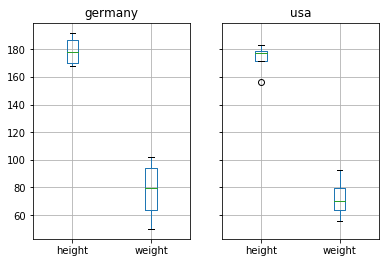

In [194]:
from matplotlib import pyplot as plt
df.groupby("nationality").boxplot()
plt.show()

### Durch Gruppen iterieren

In [195]:
gender = df.groupby("gender")
for group_name, group_data in gender:
    print(group_name)
    print(group_data)
    print("---")

f
  gender  height nationality  weight
1      f     156         usa      56
2      f     177         usa      66
4      f     168     germany      50
7      f     171     germany      68
---
m
  gender  height nationality  weight
0      m     183         usa      93
3      m     177         usa      75
5      m     192     germany     102
6      m     185     germany      91
---


### Eine einzelne Gruppe herausgreifen

In [196]:
gender.get_group("f")

,gender,height,nationality,weight
1,f,156,usa,56
2,f,177,usa,66
4,f,168,germany,50
7,f,171,germany,68


## Merging two Dataframes

Wir haben zwei Dataframes, die eine gemeinsame Spalte haben:

In [197]:
i1 = pd.Series(["a","b","c","d","g"], name="stadt")
i2 = pd.Series([3,5.5,22,2, 12], name="land")
d1 = pd.DataFrame([i1, i2])
d1 = d1.T
d1

,stadt,land
0,a,3
1,b,5.5
2,c,22
3,d,2
4,g,12


In [198]:
i1 = pd.Series(["a","b","c","d", "e", "f"], name="stadt")
i2 = pd.Series(["ich","du", "er", "sie", "uns", "wir"], name="pros")
d2 = pd.DataFrame([i1, i2])
d2 = d2.T
d2


,stadt,pros
0,a,ich
1,b,du
2,c,er
3,d,sie
4,e,uns
5,f,wir


In [199]:
pd.merge(d1, d2, on="stadt", how="inner")

,stadt,land,pros
0,a,3,ich
1,b,5.5,du
2,c,22,er
3,d,2,sie


In [200]:
pd.merge(d1, d2, on="stadt", how="outer")

,stadt,land,pros
0,a,3,ich
1,b,5.5,du
2,c,22,er
3,d,2,sie
4,g,12,NaN
5,e,NaN,uns
6,f,NaN,wir


In [201]:
pd.merge(d1, d2, on="stadt", how="left")

,stadt,land,pros
0,a,3,ich
1,b,5.5,du
2,c,22,er
3,d,2,sie
4,g,12,NaN


### Literatur

Neben den Tutorials in der Pandas-Dokumentation kann ich diese Video empfehlen, das besonders für diejenigen interessant sein wird, die sich schon ganz gut mit SQL auskennen: <a href="https://www.youtube.com/watch?v=1uVWjdAbgBg">Greg Reda - Translating SQL to pandas. And back</a><br/>
<a href="https://drive.google.com/folderview?id=0ByIrJAE4KMTtaGhRcXkxNHhmY2M&usp=sharing">Pandas Cheat Sheet</a> by Marc Graph